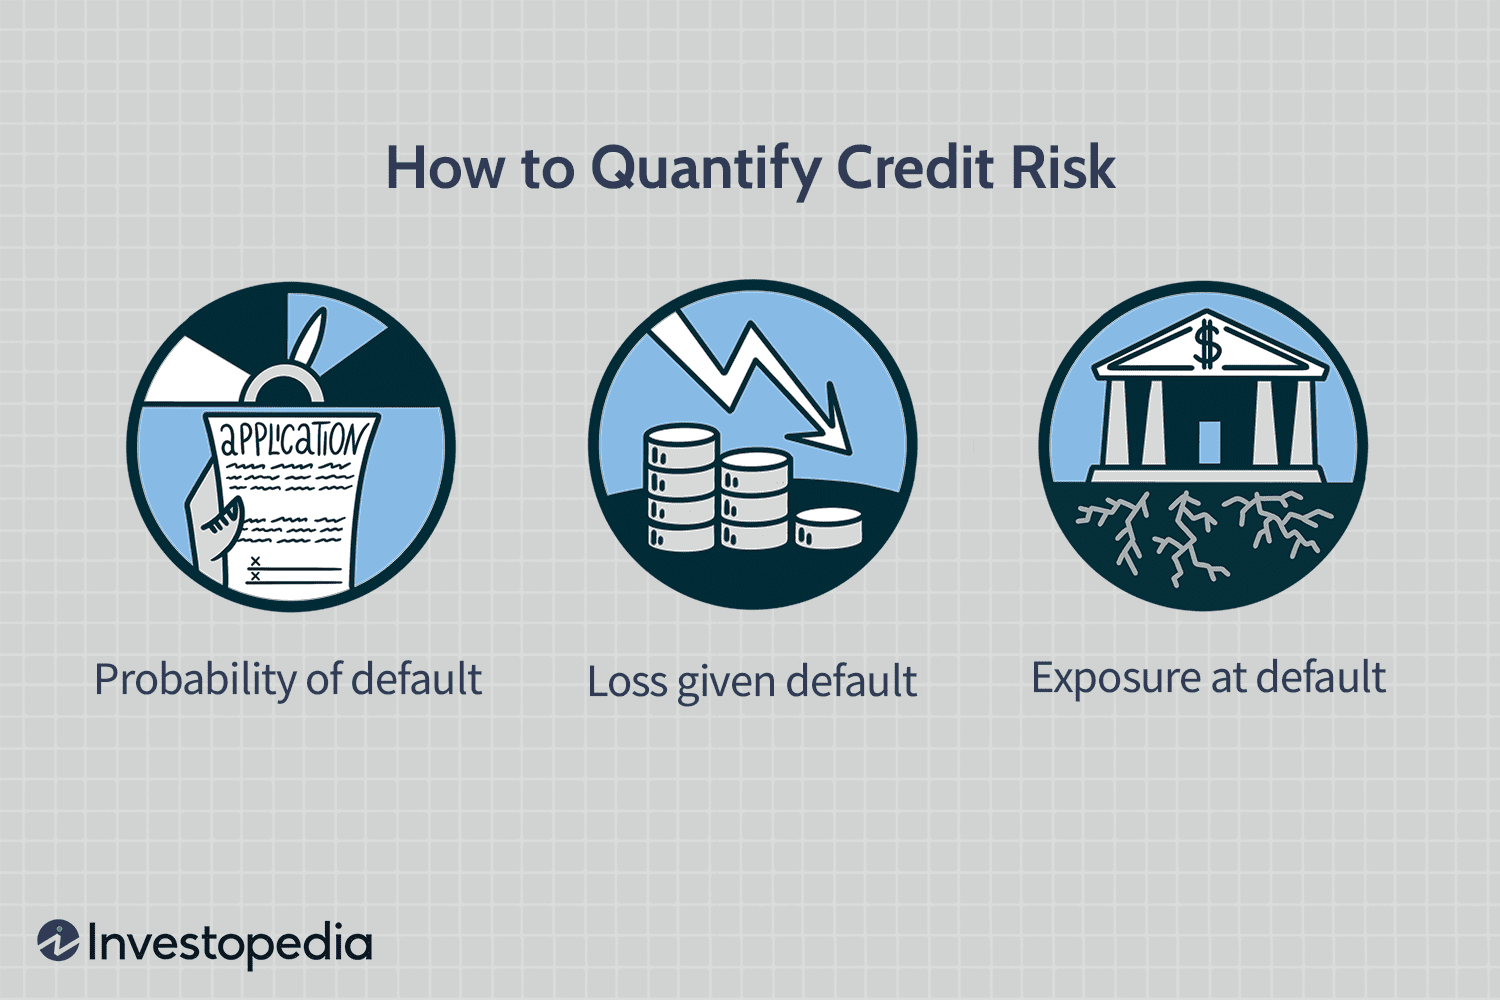

# Analyzing borrowers’ risk of defaulting

This project is to prepare a report for a bank’s loan division. I had to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a credit scoring of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

**Introduction to the data**

Problems which supposed to be improved

1 - A lot of NaN and null columns in dataframe

2 - duplicates

3 - noise and incorrect representation of data like (negative numbers, floats)

4 - Date/time mismatch

5 - Undocumented missing data codes

6 - Confusing column names

><h2><strong>Describing data</strong></h2><div class="paragraph">—<em>children</em> : the number of children in the family </div><div class="paragraph">—<em>days_employed</em>: how long the customer has worked </div><div class="paragraph">—<em>dob_years</em>: the customer’s age </div><div class="paragraph">—<em>education</em>: the customer’s education level </div><div class="paragraph">—<em>education_id</em>: identifier for the customer’s education </div><div class="paragraph">—<em>family_status</em>: the customer’s marital status </div><div class="paragraph">—<em>family_status_id</em>: identifier for the customer’s marital status </div><div class="paragraph">—<em>gender</em>: the customer’s gender </div><div class="paragraph">—<em>income_type</em>: the customer’s income type </div><div class="paragraph">—<em>debt</em>: whether the client has ever defaulted on a loan </div><div class="paragraph">—<em>total_income</em>: monthly income </div><div class="paragraph">—<em>purpose</em>: reason for taking out a loan</div><h2>

# Step 1. Open the data file and have a look at the general information.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [182]:
borrowers_df = pd.read_csv('/content/credit_scoring_eng.csv')
borrowers_df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20579,0,-489.779594,34,secondary education,1,civil partnership,1,F,civil servant,0,31530.895,having a wedding
8030,0,-722.187004,29,secondary education,1,civil partnership,1,M,business,0,36357.464,having a wedding
15786,1,-1834.227069,35,secondary education,1,civil partnership,1,F,employee,0,42628.198,to buy a car
6144,0,369063.520843,56,bachelor's degree,0,married,0,F,retiree,0,39801.907,construction of own property
6998,0,384621.386619,63,secondary education,1,married,0,F,retiree,0,6930.520,buying a second-hand car


In [183]:
borrowers_df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

days_employed and total_income are the columns with the NaN and null in their data.

In [184]:
pd.concat([borrowers_df.dtypes, borrowers_df.isna().sum()], axis=1)

,0,1
children,int64,0
days_employed,float64,2174
dob_years,int64,0
education,object,0
education_id,int64,0
family_status,object,0
family_status_id,int64,0
gender,object,0
income_type,object,0
debt,int64,0


In [185]:
borrowers_df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [186]:
(abs(borrowers_df["days_employed"])/365).describe()

count    19351.000000
mean       183.328024
std        380.906522
min          0.066141
25%          2.539751
50%          6.011563
75%         15.172281
max       1100.699727
Name: days_employed, dtype: float64

In [187]:
borrowers_df[borrowers_df['days_employed'] < 0]['days_employed'].count()

15906

In [188]:
borrowers_df[borrowers_df['days_employed'] >= 0]['days_employed'].count()

3445

In [189]:
borrowers_df[borrowers_df['days_employed'] >= 0]['days_employed'].apply(lambda x: x / 365).describe()

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

In [190]:
duplicates = borrowers_df[borrowers_df.duplicated()]
duplicates.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18428,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,housing
19832,0,NaN,48,secondary education,1,married,0,F,employee,0,NaN,housing renovation
7808,0,NaN,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
19321,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,NaN,second-hand car purchase
18755,0,NaN,58,secondary education,1,married,0,F,retiree,0,NaN,to become educated


In [191]:
100*(len(duplicates) / len(borrowers_df))

0.2508710801393728




* days_employed" is incorrect column, it couldn't be negative, and it has unknown measure. we need fix it or drop this column

* we need categorize data and lemmatize (column "purpose")
we need specify type of "days_employed" and "income_type"

* Dataset has 54 (0.3%) duplicate rows

* days_employed has 2174 (10.1%) missing values
total_income has 2174 (10.1%) missing values




# Step 2. Data preprocessing and visualization

In [192]:
total = borrowers_df.isnull().sum().sort_values(ascending=False)
percent = (borrowers_df.isnull().sum()/borrowers_df.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
miss_data['Missing Percent'] = miss_data['Missing Percent'].apply(lambda x: x * 100)
miss_data.loc[miss_data['Missing Percent'] > 10][:10]

,Total,Missing Percent
days_employed,2174,10.099884
total_income,2174,10.099884


In [193]:
def fill_days_employed():
    global borrowers_df
    fillna_value("days_employed", borrowers_df['days_employed'].median())
def fillna_value(column, value):
    global borrowers_df
    borrowers_df[column].fillna(value, inplace=True)

In [194]:
borrowers_df.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [195]:
borrowers_df.isna().any()

children            False
days_employed        True
dob_years           False
education           False
education_id        False
family_status       False
family_status_id    False
gender              False
income_type         False
debt                False
total_income         True
purpose             False
dtype: bool

In [196]:
borrowers_df['children'] = borrowers_df['children'].replace(-1, 1)
borrowers_df['children'] = borrowers_df['children'].replace(20, 2)
borrowers_df['days_employed']= abs(borrowers_df['days_employed'])
borrowers_df['gender'].unique()
borrowers_df[borrowers_df['gender']=='XNA']

array(['F', 'M', 'XNA'], dtype=object)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [197]:
borrowers_df = borrowers_df[borrowers_df['gender'] != 'XNA']
borrowers_df[borrowers_df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [198]:
borrowers_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [199]:
borrowers_df['days_employed'] = borrowers_df['days_employed'].astype(int, errors='ignore')
borrowers_df['total_income'] = borrowers_df['total_income'].astype(int, errors='ignore')

In [200]:
borrowers_df['total_income'].dtypes

dtype('float64')

In [201]:
def to_case():
    global borrowers_df
    borrowers_df['education'] = borrowers_df['education'].str.lower()
    borrowers_df['family_status'] = borrowers_df['family_status'].str.lower()
    borrowers_df['gender'] = borrowers_df['gender'].str.upper()
    borrowers_df['income_type'] = borrowers_df['income_type'].str.lower()
    borrowers_df['purpose'] = borrowers_df['purpose'].str.lower()

In [202]:
to_case()

In [203]:
borrowers_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Lemmatization

In [204]:
purposes = borrowers_df['purpose'].unique()
display(purposes)
len(purposes)

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

38

In [205]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = set(stopwords.words('english'))
is_noun = lambda pos: pos[:2] == 'NN'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [206]:
wordnet_lemma = WordNetLemmatizer()
lemmas = []
for text in purposes:
    words = nltk.word_tokenize(text.lower())
    lemmas += [wordnet_lemma.lemmatize(w, pos='n') for (w,pos) in nltk.pos_tag(words) if w not in stopwords and is_noun(pos)]
purpose_categories = list(Counter(lemmas).keys())
purpose_categories

['purchase',
 'house',
 'car',
 'education',
 'wedding',
 'housing',
 'transaction',
 'family',
 'estate',
 'construction',
 'property',
 'second-hand',
 'ceremony',
 'profile',
 'university',
 'renovation']

In [207]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')

In [208]:
category_purpose_dict = {text_purpose:next(category for category in purpose_categories if english_stemmer.stem(category) in text_purpose or category in text_purpose) for text_purpose in set(borrowers_df['purpose'])}
category_purpose_dict

{'buy residential real estate': 'estate',
 'buying property for renting out': 'property',
 'housing renovation': 'house',
 'purchase of my own house': 'purchase',
 'buying a second-hand car': 'car',
 'buying my own car': 'car',
 'supplementary education': 'education',
 'housing': 'house',
 'real estate transactions': 'transaction',
 'second-hand car purchase': 'purchase',
 'buy real estate': 'estate',
 'purchase of the house': 'purchase',
 'getting an education': 'education',
 'transactions with commercial real estate': 'transaction',
 'building a real estate': 'estate',
 'housing transactions': 'house',
 'transactions with my real estate': 'transaction',
 'purchase of the house for my family': 'purchase',
 'education': 'education',
 'to have a wedding': 'wedding',
 'car': 'car',
 'to become educated': 'education',
 'getting higher education': 'education',
 'to get a supplementary education': 'education',
 'to own a car': 'car',
 'building a property': 'property',
 'cars': 'car',
 'uni

In [209]:
#some hand fixing
for k, v in category_purpose_dict.items():
    if not v=='car' and 'car' in k:
        category_purpose_dict[k] = 'car'
        continue
    if not v=='house' and ('estate' in k or 'house' in k):
        category_purpose_dict[k] = 'house'
        continue
    if not v=='property' and ('construction' in k or 'property' in k):
        category_purpose_dict[k] = 'property'
        continue
category_purpose_dict

{'buy residential real estate': 'house',
 'buying property for renting out': 'property',
 'housing renovation': 'house',
 'purchase of my own house': 'house',
 'buying a second-hand car': 'car',
 'buying my own car': 'car',
 'supplementary education': 'education',
 'housing': 'house',
 'real estate transactions': 'house',
 'second-hand car purchase': 'car',
 'buy real estate': 'house',
 'purchase of the house': 'house',
 'getting an education': 'education',
 'transactions with commercial real estate': 'house',
 'building a real estate': 'house',
 'housing transactions': 'house',
 'transactions with my real estate': 'house',
 'purchase of the house for my family': 'house',
 'education': 'education',
 'to have a wedding': 'wedding',
 'car': 'car',
 'to become educated': 'education',
 'getting higher education': 'education',
 'to get a supplementary education': 'education',
 'to own a car': 'car',
 'building a property': 'property',
 'cars': 'car',
 'university education': 'education',
 '

In [210]:
borrowers_df['purpose'] = borrowers_df['purpose'].replace(category_purpose_dict)
borrowers_df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
15726,2,336.555198,36,secondary education,1,married,0,M,business,0,15443.261,house
10151,1,806.065176,25,secondary education,1,married,0,F,employee,0,19118.690,house
8196,0,767.711750,50,secondary education,1,married,0,M,employee,0,22705.467,education
9658,0,7071.245408,61,secondary education,1,unmarried,4,F,business,0,27706.769,house
16111,0,467.346720,41,secondary education,1,civil partnership,1,M,business,0,27594.641,house


In [211]:
borrowers_df['purpose'].unique()

array(['house', 'car', 'education', 'wedding', 'property', 'university'],
      dtype=object)

Conclusion

For our purposes(for example - classification) we need to process our data (purpose column) which is represented by sentences on natural language. Therefore column of purpose has been lemmatized, it will be easier categorize our data in the future

Lemmatization is done nicely

Categorizing Data
* purpose - Categorical
* income_type - Categorical
* gender - Categorical
* family_status - Categorical
* education - Categorical

In [212]:
map_purpose = {purpose:index for index, purpose in enumerate(borrowers_df['purpose'].unique())}
map_gender = {'F':1,'M':0}
map_income_type = {income_type:index for index, income_type in enumerate(borrowers_df['income_type'].unique())}

In [213]:
map_family_status = {row['family_status_id']:row['family_status'] for _, row in borrowers_df.drop_duplicates(['family_status_id', 'family_status'])[['family_status_id', 'family_status']].iterrows()}
map_education = {row['education_id']:row['education'] for _, row in borrowers_df.drop_duplicates(['education_id', 'education'])[['education_id', 'education']].iterrows()}

In [214]:
print(map_family_status)
print(map_education)

{0: 'married', 1: 'civil partnership', 2: 'widow / widower', 3: 'divorced', 4: 'unmarried'}
{0: "bachelor's degree", 1: 'secondary education', 2: 'some college', 3: 'primary education', 4: 'graduate degree'}


In [215]:
print(map_purpose)
print(map_gender)
print(map_income_type)

{'house': 0, 'car': 1, 'education': 2, 'wedding': 3, 'property': 4, 'university': 5}
{'F': 1, 'M': 0}
{'employee': 0, 'retiree': 1, 'business': 2, 'civil servant': 3, 'unemployed': 4, 'entrepreneur': 5, 'student': 6, 'paternity / maternity leave': 7}


In [216]:
borrowers_df['income_type_id'] = borrowers_df['income_type'].map(map_income_type)
borrowers_df["purpose_id"] = borrowers_df["purpose"].map(map_purpose)

borrowers_df['gender_id'] = borrowers_df['gender'].map(map_gender)
borrowers_df['gender_id'] = borrowers_df['gender_id'].astype(int)

In [217]:
cols = ['income_type', 'gender', 'purpose', 'education', 'family_status']
borrowers_df = borrowers_df.drop([col for col in cols if col in borrowers_df.columns], axis=1)

In [218]:
borrowers_df.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id
0,1,8437.673028,42,0,0,0,40620.102,0,0,1
1,1,4024.803754,36,1,0,0,17932.802,0,1,1
2,0,5623.422610,33,1,0,0,23341.752,0,0,0
3,3,4124.747207,32,1,0,0,42820.568,0,2,0
4,0,340266.072047,53,1,1,0,25378.572,1,3,1


In [219]:
borrowers_df['days_employed'] = borrowers_df['days_employed'].fillna(0)
borrowers_df['total_income']  = borrowers_df['total_income'].fillna(0)

In [220]:
borrowers_df['days_employed'].isna().any()
borrowers_df['total_income'].isna().any()

False

False

In [221]:
borrowers_df['days_employed'] = borrowers_df['days_employed'].astype(np.int64)
borrowers_df['total_income']  = borrowers_df['total_income'].astype(np.int64)

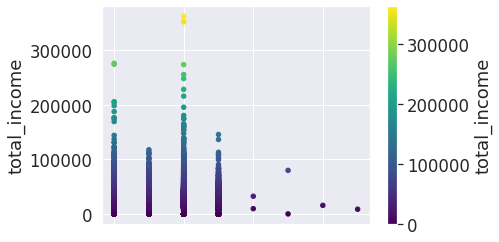

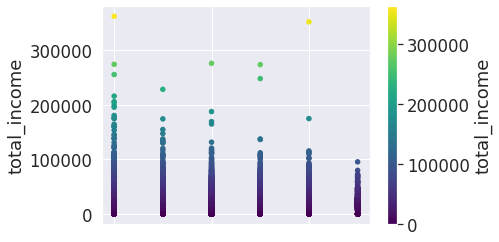

In [222]:
borrowers_df.plot.scatter(x='income_type_id',
                      y='total_income',
                      c= 'total_income',
                      colormap='viridis')
borrowers_df.plot.scatter(x='purpose_id',
                      y='total_income',
                      c= 'total_income',
                      colormap='viridis')

In [223]:
def category_total_income(total_income):
    if total_income < 75000:
        return 0
    elif 75000 <= total_income < 120000:
        return 1
    elif 120000 <= total_income < 150000:
        return 2
    elif 150000 <= total_income < 200000:
        return 3
    else:
        return 4
    
def category_children(children):
    if children < 1:
        return 0
    elif 1 <= children < 3:
        return 1
    else:
        return 2

def category_dob_years(dob_years):
    if dob_years < 35:
        return 0
    elif 35 <= dob_years < 45:
        return 1
    else:
        return 2
    

In [224]:
borrowers_df['children_category'] = borrowers_df['children'].apply(category_children)
borrowers_df['total_income_category'] = borrowers_df['total_income'].apply(category_total_income)
borrowers_df['dob_years_category'] = borrowers_df['dob_years'].apply(category_dob_years)

In [322]:
kk = pd.read_csv('/content/credit_scoring_eng.csv')

In [325]:
borrowers_df.head()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id,children_category,total_income_category,dob_years_category,has_children,bachelor
0,1,8437,42,0,0,0,40620,0,0,1,1,0,1,1,1
1,1,4024,36,1,0,0,17932,0,1,1,1,0,1,1,0
2,0,5623,33,1,0,0,23341,0,0,0,0,0,0,0,0
3,3,4124,32,1,0,0,42820,0,2,0,2,0,0,1,0
4,0,340266,53,1,1,0,25378,1,3,1,0,0,2,0,0


In [319]:
borrowers_df['has_children'] = borrowers_df['children'].apply(lambda c: int(c>0))

In [324]:
borrowers_df['bachelor'] = borrowers_df['education_id'].apply(lambda c: int(c==0))

Conclusion\
Categorization is important task, and we categorized 'dob_years', 'total_income' and 'children'columns. Purpose, gender, family_status, education were encoded. It's important step in the EDA, in the future we could use this columns for example for building some models(decision tree).

Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c3e677410>,
      dtype=object)

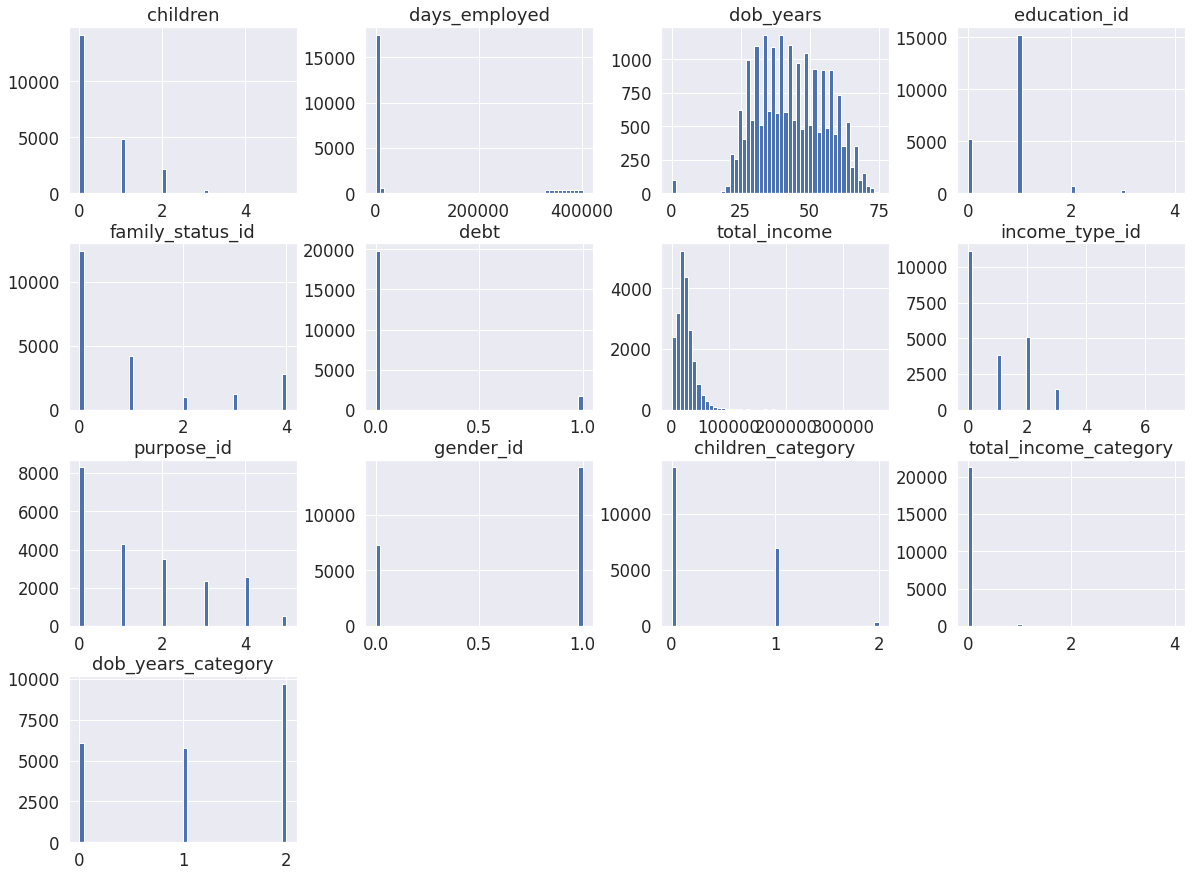

In [226]:
borrowers_df.hist(bins=50 ,figsize=(20,15))
plt.show()

<Figure size 864x576 with 0 Axes>

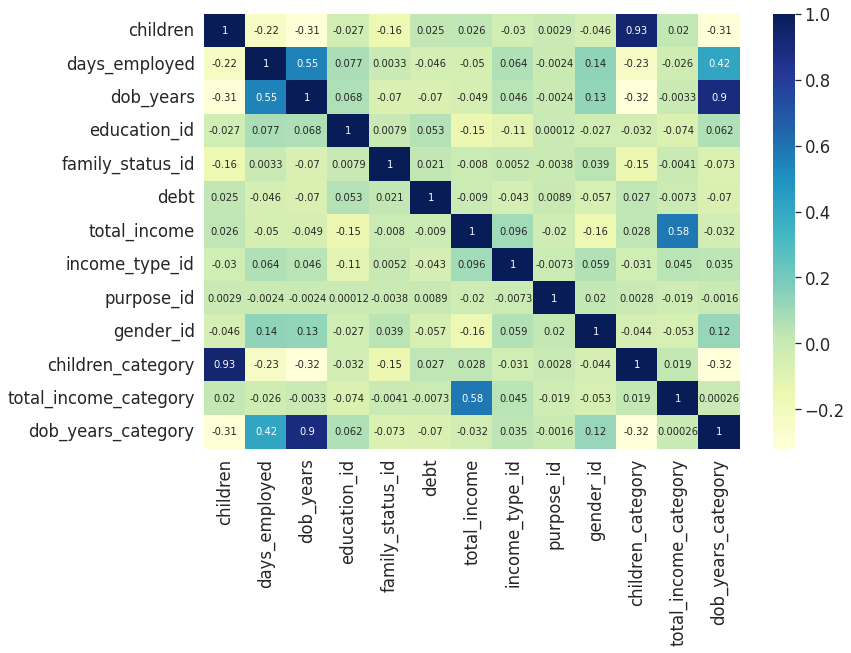

In [227]:
plt.figure(figsize = (12,8))
sns.heatmap(borrowers_df.corr() , annot = True , cmap = "YlGnBu")

In [228]:
def data_counting(segment):
    sns.countplot(x=borrowers_df[segment])

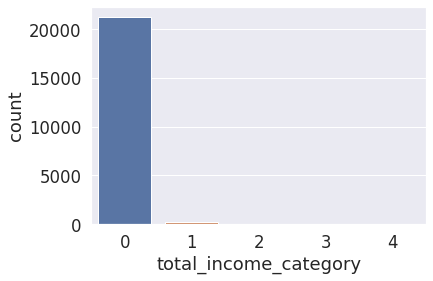

In [229]:
data_counting('total_income_category')

The zero category represents the loans < 75.000

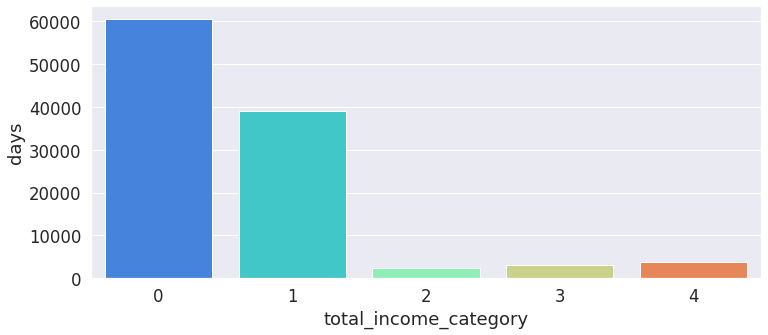

In [230]:
fig = plt.figure(figsize=(12, 5))
ax = sns.barplot(x=borrowers_df['total_income_category'].sort_values(ascending=True), 
                 y=borrowers_df['days_employed'], 
                 palette='rainbow',
                 ci = None)
plt.ylabel('days');

In [231]:
def plot(x,y,hue):
  sns.set_context('notebook', font_scale = 1.3)
  plt.figure(figsize=(20, 7))
  ax = sns.barplot(x=borrowers_df[x], 
                 y=borrowers_df[y],
                 hue = borrowers_df[hue], 
                 palette='viridis',
                 ci = None)
  plt.ylabel(y)

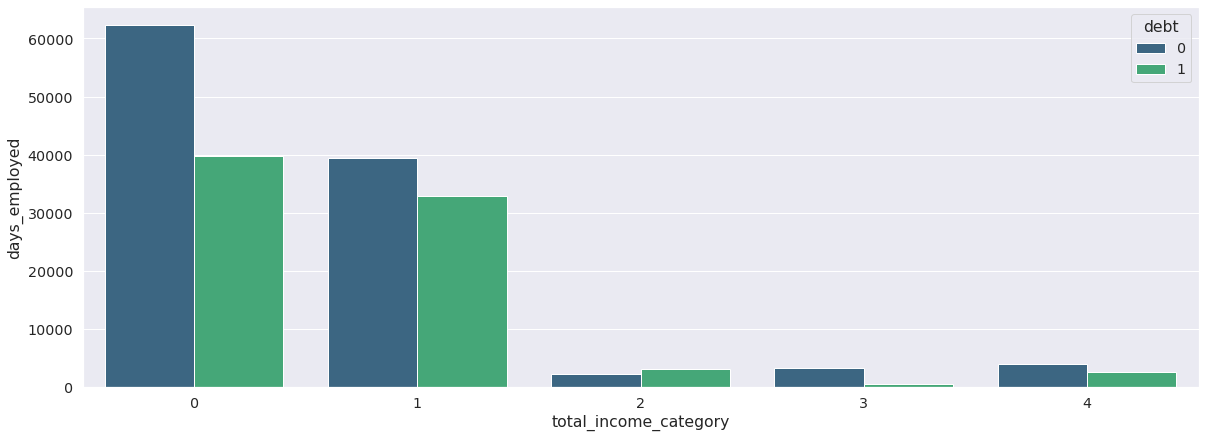

In [232]:
plot('total_income_category','days_employed','debt')

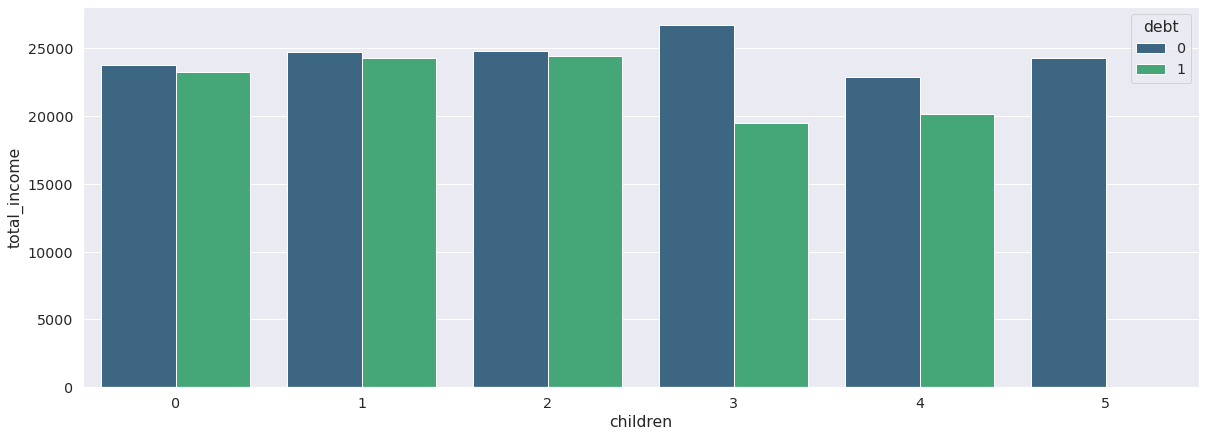

In [233]:
plot('children','total_income','debt')

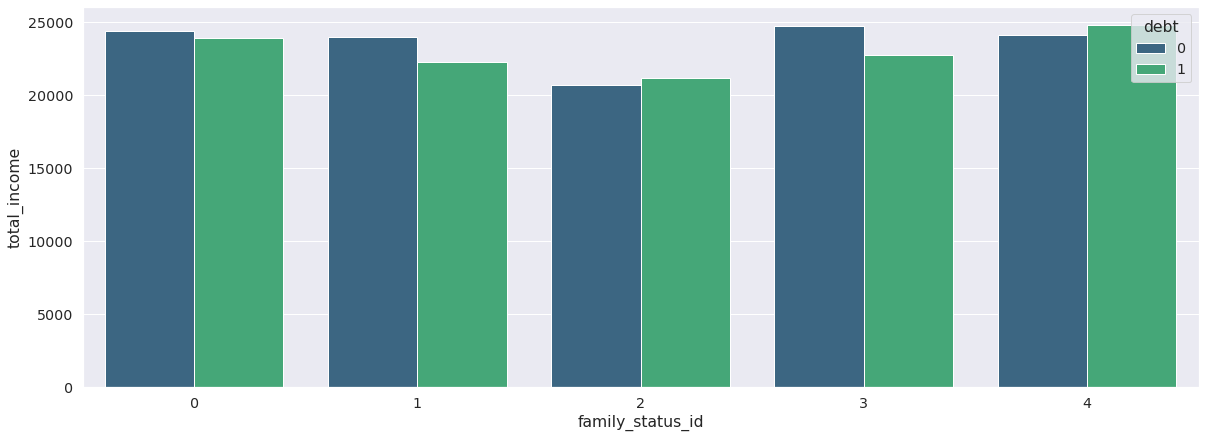

In [234]:
plot('family_status_id','total_income','debt')

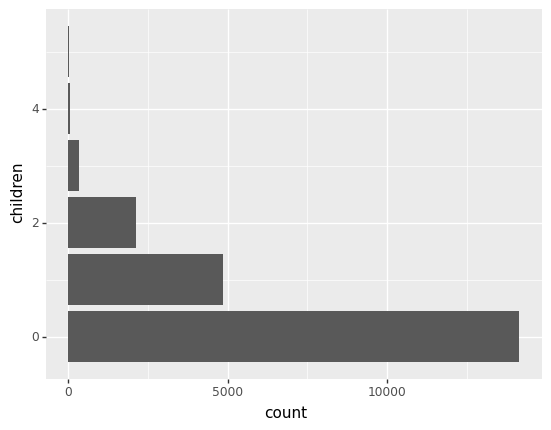

<ggplot: (8752135734109)>

In [235]:
ggplot(borrowers_df) + aes(x="children") + geom_bar() + coord_flip()

# MACHINE LEARNING

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *
import seaborn as sns
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [326]:
borrowers_df.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,purpose_id,gender_id,children_category,total_income_category,dob_years_category,has_children,bachelor
0,1,8437,42,0,0,0,40620,0,0,1,1,0,1,1,1
1,1,4024,36,1,0,0,17932,0,1,1,1,0,1,1,0
2,0,5623,33,1,0,0,23341,0,0,0,0,0,0,0,0
3,3,4124,32,1,0,0,42820,0,2,0,2,0,0,1,0
4,0,340266,53,1,1,0,25378,1,3,1,0,0,2,0,0


In [327]:
y  = borrowers_df['debt']
X  = borrowers_df.drop('debt', axis=1) 

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.9,
                                                    random_state=42)

In [329]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=10, 
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

In [330]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Fitting 10 folds for each of 8 candidates, totalling 80 fits


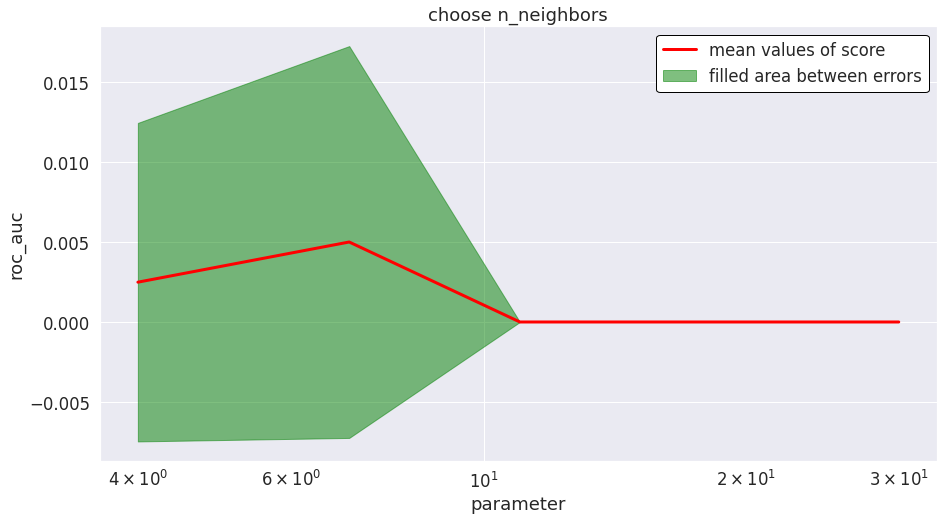

(array([0.00249282, 0.00500825, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 array([0.00498639, 0.00613427, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

Fitting 10 folds for each of 29 candidates, totalling 290 fits


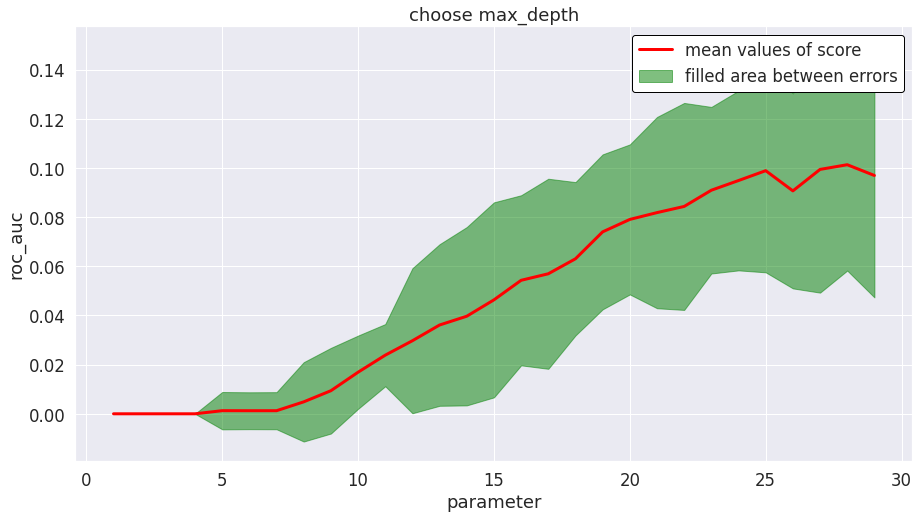

(array([0.        , 0.        , 0.        , 0.        , 0.00126582,
        0.00125   , 0.00125786, 0.00485614, 0.00938889, 0.01691367,
        0.02384763, 0.02972065, 0.03611663, 0.03968794, 0.04634673,
        0.05430009, 0.05695462, 0.06305333, 0.07400569, 0.07905932,
        0.08183186, 0.08434503, 0.09093978, 0.0948777 , 0.09888954,
        0.09067318, 0.09940191, 0.10131236, 0.09693586]),
 array([0.        , 0.        , 0.        , 0.        , 0.00379747,
        0.00375   , 0.00377358, 0.00806976, 0.00871075, 0.00744955,
        0.00632304, 0.01474975, 0.01643276, 0.01813563, 0.01983135,
        0.01729575, 0.01932922, 0.01559239, 0.01575878, 0.0152537 ,
        0.01944836, 0.02104868, 0.01693955, 0.01827193, 0.02067502,
        0.01983348, 0.02506177, 0.02152777, 0.02479908]))

In [331]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [332]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []
    
    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]
    
    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]
    
    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_
    
    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)
        
        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
    
    scores = np.array(scores)
    
    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

RandomForestClassifier()

  0%|          | 0/100 [00:00<?, ?it/s]

RandomForestClassifier()

  0%|          | 0/100 [00:00<?, ?it/s]

RandomForestClassifier()

  0%|          | 0/100 [00:00<?, ?it/s]

RandomForestClassifier()

  0%|          | 0/100 [00:00<?, ?it/s]

RandomForestClassifier()

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Quality of random forest')

Text(0.5, 0, 'number of trees')

Text(0, 0.5, 'roc-auc')

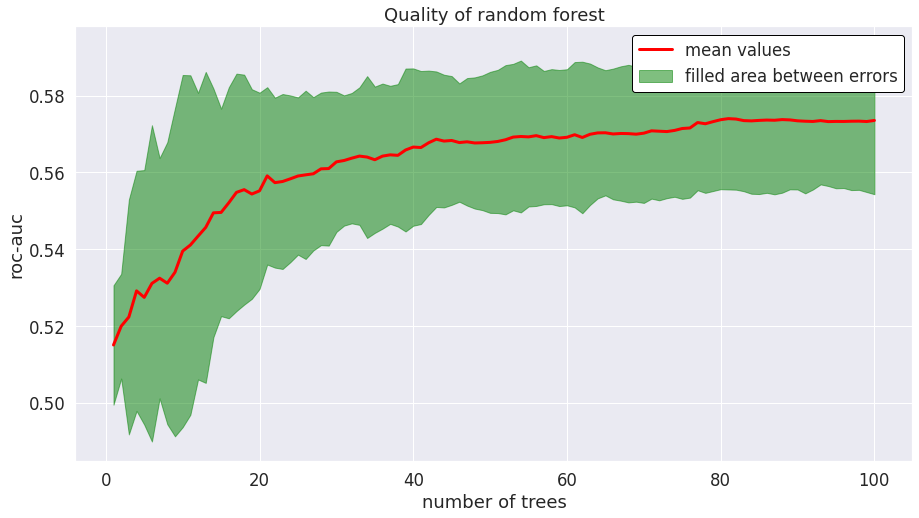

In [333]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values, 
                 mean_cross_val_score - 2 * std_cross_val_score, 
                 mean_cross_val_score + 2 * std_cross_val_score, 
                 color='green', 
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [334]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


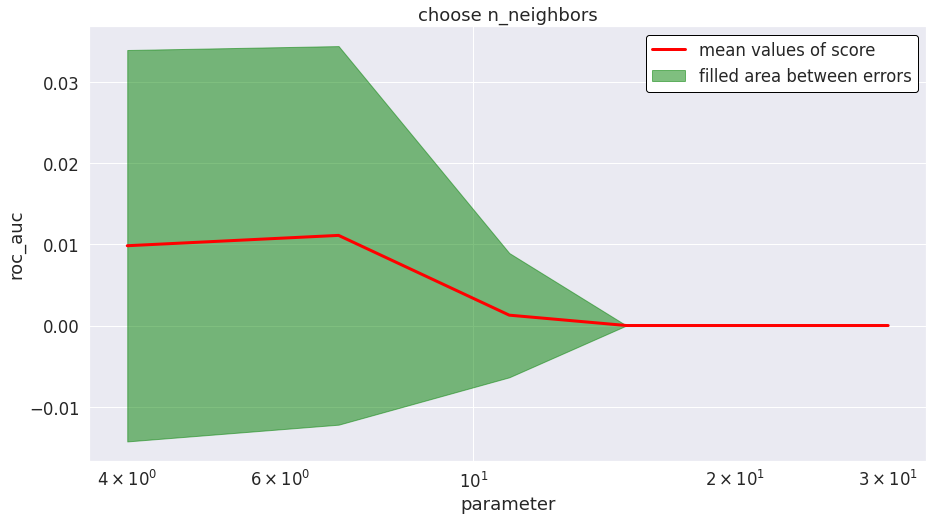

In [335]:
search_and_draw(X_train_scaled, y_train, KNeighborsClassifier(), 'n_neighbors', 
                np.array(np.linspace(4, 30, 8), dtype='int'), 'log');

In [336]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [337]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
print(test_auc)

0.9999295822820974
0.56655809984355


<Figure size 1440x720 with 0 Axes>

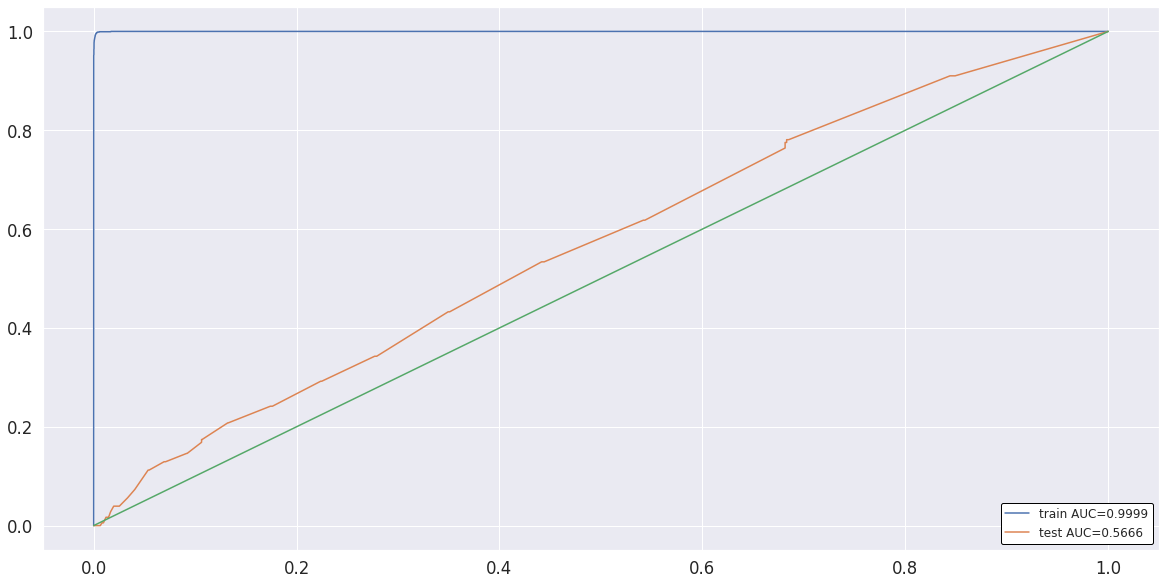

In [338]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [339]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

In [340]:
models = []
models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=30))
models.append(LogisticRegression())
models.append(RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1))
models.append(RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1))
models.append(DecisionTreeClassifier(max_depth=8))

In [341]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [342]:
for model in tqdm(models):
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

In [343]:
stacking_model = LogisticRegression()
stacking_model.fit(meta_features_train, y_train)

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted = stacking_model.predict_proba(meta_features_test)[:, 1]

LogisticRegression()

<Figure size 720x504 with 0 Axes>

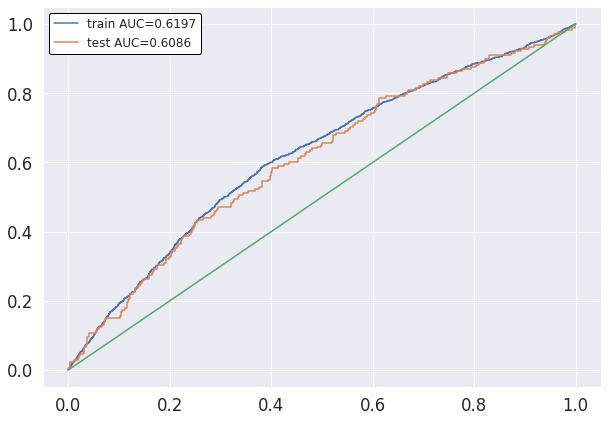

In [344]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [345]:
import xgboost

In [346]:
boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

XGBClassifier(n_estimators=500)

<Figure size 720x504 with 0 Axes>

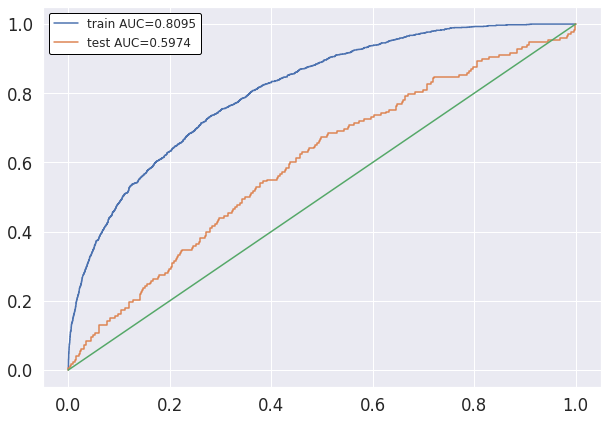

In [347]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()